<h2><center>California K-12 Public Schools</center></h2>
<h1><center>Meeting the Standards Projection</center></h1>


   <img src='images/MDR-education-data-hygiene.jpg' width="900">
   
   **Credit:**  [mdr education](https://mdreducation.com/2018/04/05/5-tips-spring-clean-education-data/)



In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

sns.set(style='ticks')

warnings.filterwarnings("ignore")  # Suppress all warnings

# DATA CLEANING

## Data definition
1. Column name
2. Data type
3. Description of column
4. Count or percent per unique values or code (includes NA)
5. Range of values

## Handling missing data
1. Identify how many NA are in the dataset
df.info()
.isnull()
value_counts()
2. Review the percentage of observatios missing per column
3. Drop, impute, or replace missing values

## Removing duplicates
- df.duplicated().sum()
- df.drop_duplicates()

## Language Arts & Literature Dataset:

In [2]:
# Load datafile
df_language = pd.read_csv('data/df_language')

# Check the dataset
df_language

,School Name,School Code,Zip Code,County Name,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,129882,92223,Riverside,33.0,33.962281,-116.984589,64738.0,58,88.0,...,33,NaN,18,NaN,6,13,22,9,4,44.64
1,A. E. Arnold Elementary,6027767,90630,Orange,30.0,33.824900,-118.045700,84051.0,447,739.0,...,131,*,111,7,15,44,85,138,121,65.60
2,A. G. Cook Elementary,6028211,92844,Orange,30.0,33.777700,-117.953000,48345.0,192,366.0,...,43,NaN,10,6,*,13,14,33,6,81.18
3,A. G. Currie Middle,6085377,92780,Orange,30.0,33.743100,-117.824900,64089.0,585,611.0,...,532,*,15,*,223,168,82,39,15,30.38
4,A. J. Dorsa Elementary,6046114,95122,Santa Clara,43.0,37.369388,-121.833560,57470.0,184,371.0,...,166,NaN,*,*,82,55,24,15,*,29.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,iLEAD Online,136531,93510,Los Angeles,19.0,34.472708,-118.196768,89403.0,52,73.0,...,14,NaN,22,*,*,*,11,18,12,50.00
10431,iLead Agua Dulce,138297,91390,Los Angeles,19.0,34.472708,-118.196768,105659.0,64,119.0,...,24,NaN,30,9,NaN,*,17,16,10,37.93
10432,iQ Academy California-Los Angeles,120600,93065,Los Angeles,19.0,33.985314,-117.888584,94173.0,405,702.0,...,36,8,166,33,NaN,9,25,18,5,38.84
10433,one.Charter,120717,95206,San Joaquin,39.0,NaN,NaN,42404.0,184,509.0,...,112,*,16,13,63,47,35,10,9,6.15


In [3]:
# Column names
df_language.columns

Index(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude', 'Median Household Income',
       'CAASPP Reported Enrollment', 'Enrollment K-12',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil',
       'Free Meal Count K-12', 'Current Expense Per ADA', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above'],
      dtype='object')

In [4]:
# Check data type
df_language.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10435 entries, 0 to 10434
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   School Name                        10435 non-null  object 
 1   School Code                        10435 non-null  int64  
 2   Zip Code                           10435 non-null  int64  
 3   County Name                        10435 non-null  object 
 4   County Code                        10434 non-null  float64
 5   Latitude                           9310 non-null   float64
 6   Longitude                          9310 non-null   float64
 7   Median Household Income            10367 non-null  float64
 8   CAASPP Reported Enrollment         10434 non-null  object 
 9   Enrollment K-12                    9992 non-null   float64
 10  Total Revenue per Pupil            9310 non-null   object 
 11  Total Expenditures per Pupil       9310 non-null   obj

In [5]:
# Check missing data
df_language.isnull().sum().sort_values()

School Name                             0
School Code                             0
Zip Code                                0
County Name                             0
CAASPP Reported Enrollment              1
Non Military                            1
Percentage Standard Met and Above       1
County Code                             1
Non Homeless                            5
Male                                   51
Median Household Income                68
Disadvantaged                         149
Not Disadvantaged                     197
Hispanic                              214
Female                                253
Some College                          367
High School Grad                      392
Free Meal Count K-12                  443
Enrollment K-12                       443
Current Expense Per ADA               505
College Grad                          537
White                                 567
< High School                         948
Graduate School                   

### Run Correlation table before imputation

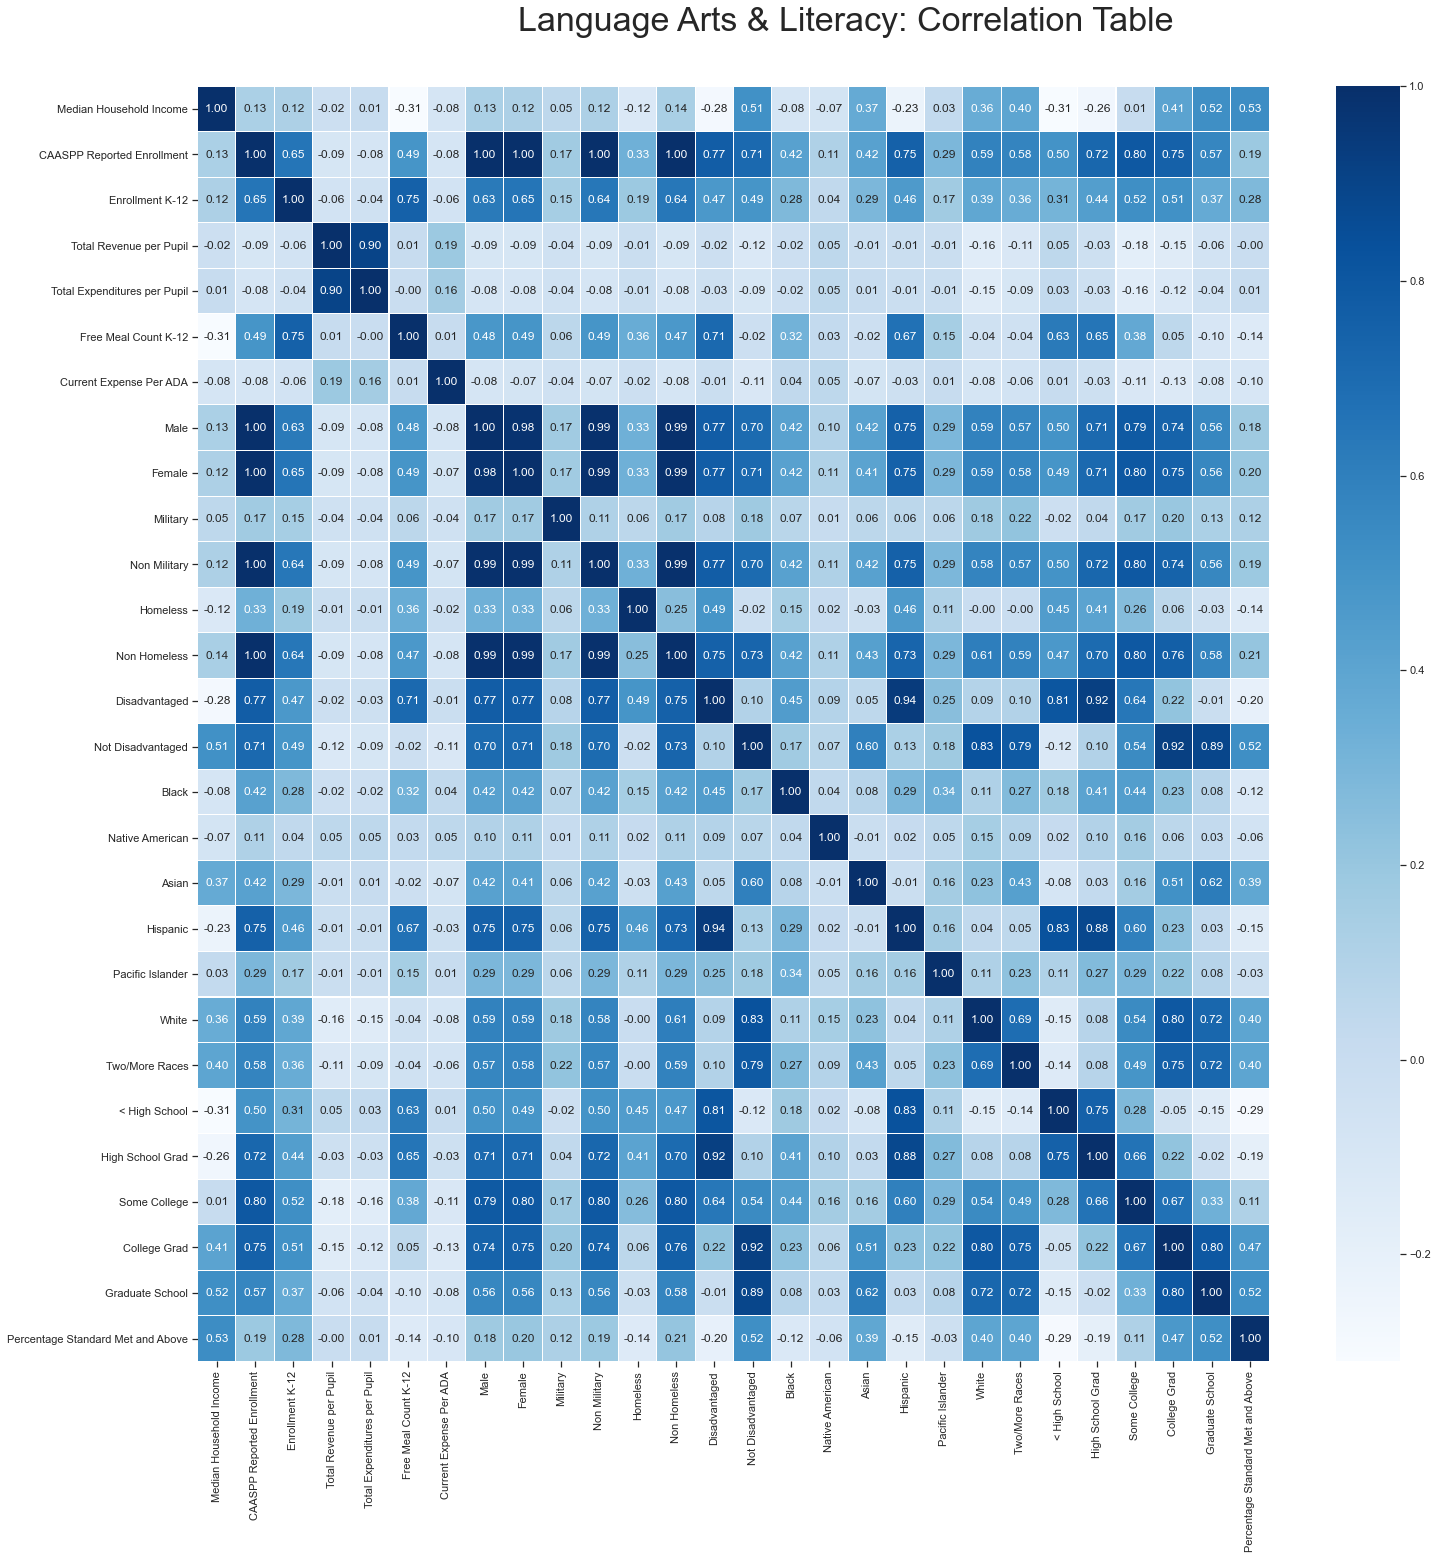

In [29]:
# Drop NaNs
df_filtered = df_language.dropna()


# Select variables
table = df_filtered[['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]


# Run correlation on table constructed with count instead of percentage values
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)


---------

### Dealing with missing data and updating data type.

- Data types:
    - Update values to int64, string or float as appropriate.
- Dealing with missing values:
    - Imputation:
        - Fill missing values with appropriate method.
- Differentiate NaN from other types of missing data:
    - NaNs = 0
    - * = -1

In [6]:
#Turn following columns into numeric
cols = ['Total Revenue per Pupil', 'Total Expenditures per Pupil', 'Percentage Standard Met and Above']
df_language[cols] = df_language[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [7]:
# drop rows where there's no value for the dependent variables
df_language = df_language[df_language['Percentage Standard Met and Above'].notna()]

In [8]:
# Fill demographic columns NaN with 0 and * with -1
df_language.update(df_language[['CAASPP Reported Enrollment', 'Latitude',
       'Enrollment K-12','Male', 'Female', 'Military', 'Non Military', 'Longitude',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']].replace('*', -1).fillna(0))

df_language.head()

,School Name,School Code,Zip Code,County Name,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,129882,92223,Riverside,33.0,33.962281,-116.984589,64738.0,58,88.0,...,33,0,18,0,6,13,22,9,4,44.64
1,A. E. Arnold Elementary,6027767,90630,Orange,30.0,33.824900,-118.045700,84051.0,447,739.0,...,131,-1,111,7,15,44,85,138,121,65.60
2,A. G. Cook Elementary,6028211,92844,Orange,30.0,33.777700,-117.953000,48345.0,192,366.0,...,43,0,10,6,-1,13,14,33,6,81.18
3,A. G. Currie Middle,6085377,92780,Orange,30.0,33.743100,-117.824900,64089.0,585,611.0,...,532,-1,15,-1,223,168,82,39,15,30.38
4,A. J. Dorsa Elementary,6046114,95122,Santa Clara,43.0,37.369388,-121.833560,57470.0,184,371.0,...,166,0,-1,-1,82,55,24,15,-1,29.83


In [9]:
# Turn following columns into numeric
cols = ['CAASPP Reported Enrollment', 'County Code', 'Latitude',
       'Enrollment K-12','Male', 'Female', 'Military', 'Non Military', 'Longitude',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']

df_language[cols] = df_language[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# checking the result
df_language.head()

,School Name,School Code,Zip Code,County Name,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,129882,92223,Riverside,33.0,33.962281,-116.984589,64738.0,58.0,88.0,...,33.0,0.0,18.0,0.0,6.0,13.0,22.0,9.0,4.0,44.64
1,A. E. Arnold Elementary,6027767,90630,Orange,30.0,33.824900,-118.045700,84051.0,447.0,739.0,...,131.0,-1.0,111.0,7.0,15.0,44.0,85.0,138.0,121.0,65.60
2,A. G. Cook Elementary,6028211,92844,Orange,30.0,33.777700,-117.953000,48345.0,192.0,366.0,...,43.0,0.0,10.0,6.0,-1.0,13.0,14.0,33.0,6.0,81.18
3,A. G. Currie Middle,6085377,92780,Orange,30.0,33.743100,-117.824900,64089.0,585.0,611.0,...,532.0,-1.0,15.0,-1.0,223.0,168.0,82.0,39.0,15.0,30.38
4,A. J. Dorsa Elementary,6046114,95122,Santa Clara,43.0,37.369388,-121.833560,57470.0,184.0,371.0,...,166.0,0.0,-1.0,-1.0,82.0,55.0,24.0,15.0,-1.0,29.83


In [10]:
# Impute missing data with median for the following columns
df_language['Median Household Income'].fillna(df_language['Median Household Income'].median(), inplace=True)
df_language['Free Meal Count K-12'].fillna(df_language['Free Meal Count K-12'].median(), inplace=True)
df_language['Current Expense Per ADA'].fillna(df_language['Current Expense Per ADA'].median(), inplace=True)
df_language['Total Revenue per Pupil'].fillna(df_language['Total Revenue per Pupil'].median(), inplace=True)
df_language['Total Expenditures per Pupil'].fillna(df_language['Total Expenditures per Pupil'].median(), inplace=True)

# percentage of missing data per column
percent_missing = (df_language.isnull().sum() * 100 / len(df_language)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

# sorting values in ascending format
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,percent_missing
School Name,0.0
Non Homeless,0.0
Disadvantaged,0.0
Not Disadvantaged,0.0
Black,0.0
Native American,0.0
Asian,0.0
Homeless,0.0
Hispanic,0.0
White,0.0


In [11]:
# Check for duplicate
df_language.duplicated().sum()

0

-------

## Mathematics Dataset:

In [12]:
# load datafile
df_math = pd.read_csv('data/df_math')

# Check df
df_math

,School Name,School Code,Zip Code,County Name,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,129882,92223,Riverside,33.0,33.962281,-116.984589,64738.0,58,88.0,...,33,NaN,18,NaN,6,13,22,9,4,10.71
1,A. E. Arnold Elementary,6027767,90630,Orange,30.0,33.824900,-118.045700,84051.0,447,739.0,...,131,*,111,7,15,44,85,138,121,63.41
2,A. G. Cook Elementary,6028211,92844,Orange,30.0,33.777700,-117.953000,48345.0,192,366.0,...,43,NaN,10,6,*,13,14,33,6,71.81
3,A. G. Currie Middle,6085377,92780,Orange,30.0,33.743100,-117.824900,64089.0,585,611.0,...,532,*,15,*,223,168,82,39,15,18.35
4,A. J. Dorsa Elementary,6046114,95122,Santa Clara,43.0,37.369388,-121.833560,57470.0,184,371.0,...,166,NaN,*,*,82,55,24,15,*,25.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,iLEAD Online,136531,93510,Los Angeles,19.0,34.472708,-118.196768,89403.0,52,73.0,...,14,NaN,22,*,*,*,11,18,12,18.18
10431,iLead Agua Dulce,138297,91390,Los Angeles,19.0,34.472708,-118.196768,105659.0,64,119.0,...,24,NaN,30,9,NaN,*,17,16,10,27.59
10432,iQ Academy California-Los Angeles,120600,93065,Los Angeles,19.0,33.985314,-117.888584,94173.0,405,702.0,...,36,8,166,33,NaN,9,25,18,5,13.50
10433,one.Charter,120717,95206,San Joaquin,39.0,NaN,NaN,42404.0,184,509.0,...,114,*,16,13,63,48,35,9,9,0.00


In [13]:
# Check data types
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10435 entries, 0 to 10434
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   School Name                        10435 non-null  object 
 1   School Code                        10435 non-null  int64  
 2   Zip Code                           10435 non-null  int64  
 3   County Name                        10435 non-null  object 
 4   County Code                        10433 non-null  float64
 5   Latitude                           9310 non-null   float64
 6   Longitude                          9310 non-null   float64
 7   Median Household Income            10367 non-null  float64
 8   CAASPP Reported Enrollment         10433 non-null  object 
 9   Enrollment K-12                    9992 non-null   float64
 10  Total Revenue per Pupil            9310 non-null   object 
 11  Total Expenditures per Pupil       9310 non-null   obj

In [14]:
# Missing values
df_math.isnull().sum().sort_values()

School Name                             0
School Code                             0
Zip Code                                0
County Name                             0
CAASPP Reported Enrollment              2
Non Military                            2
Percentage Standard Met and Above       2
County Code                             2
Non Homeless                            7
Male                                   53
Median Household Income                68
Disadvantaged                         149
Not Disadvantaged                     196
Hispanic                              216
Female                                255
Some College                          368
High School Grad                      390
Free Meal Count K-12                  443
Enrollment K-12                       443
Current Expense Per ADA               505
College Grad                          536
White                                 569
< High School                         948
Graduate School                   

### Run Correlation table before imputation

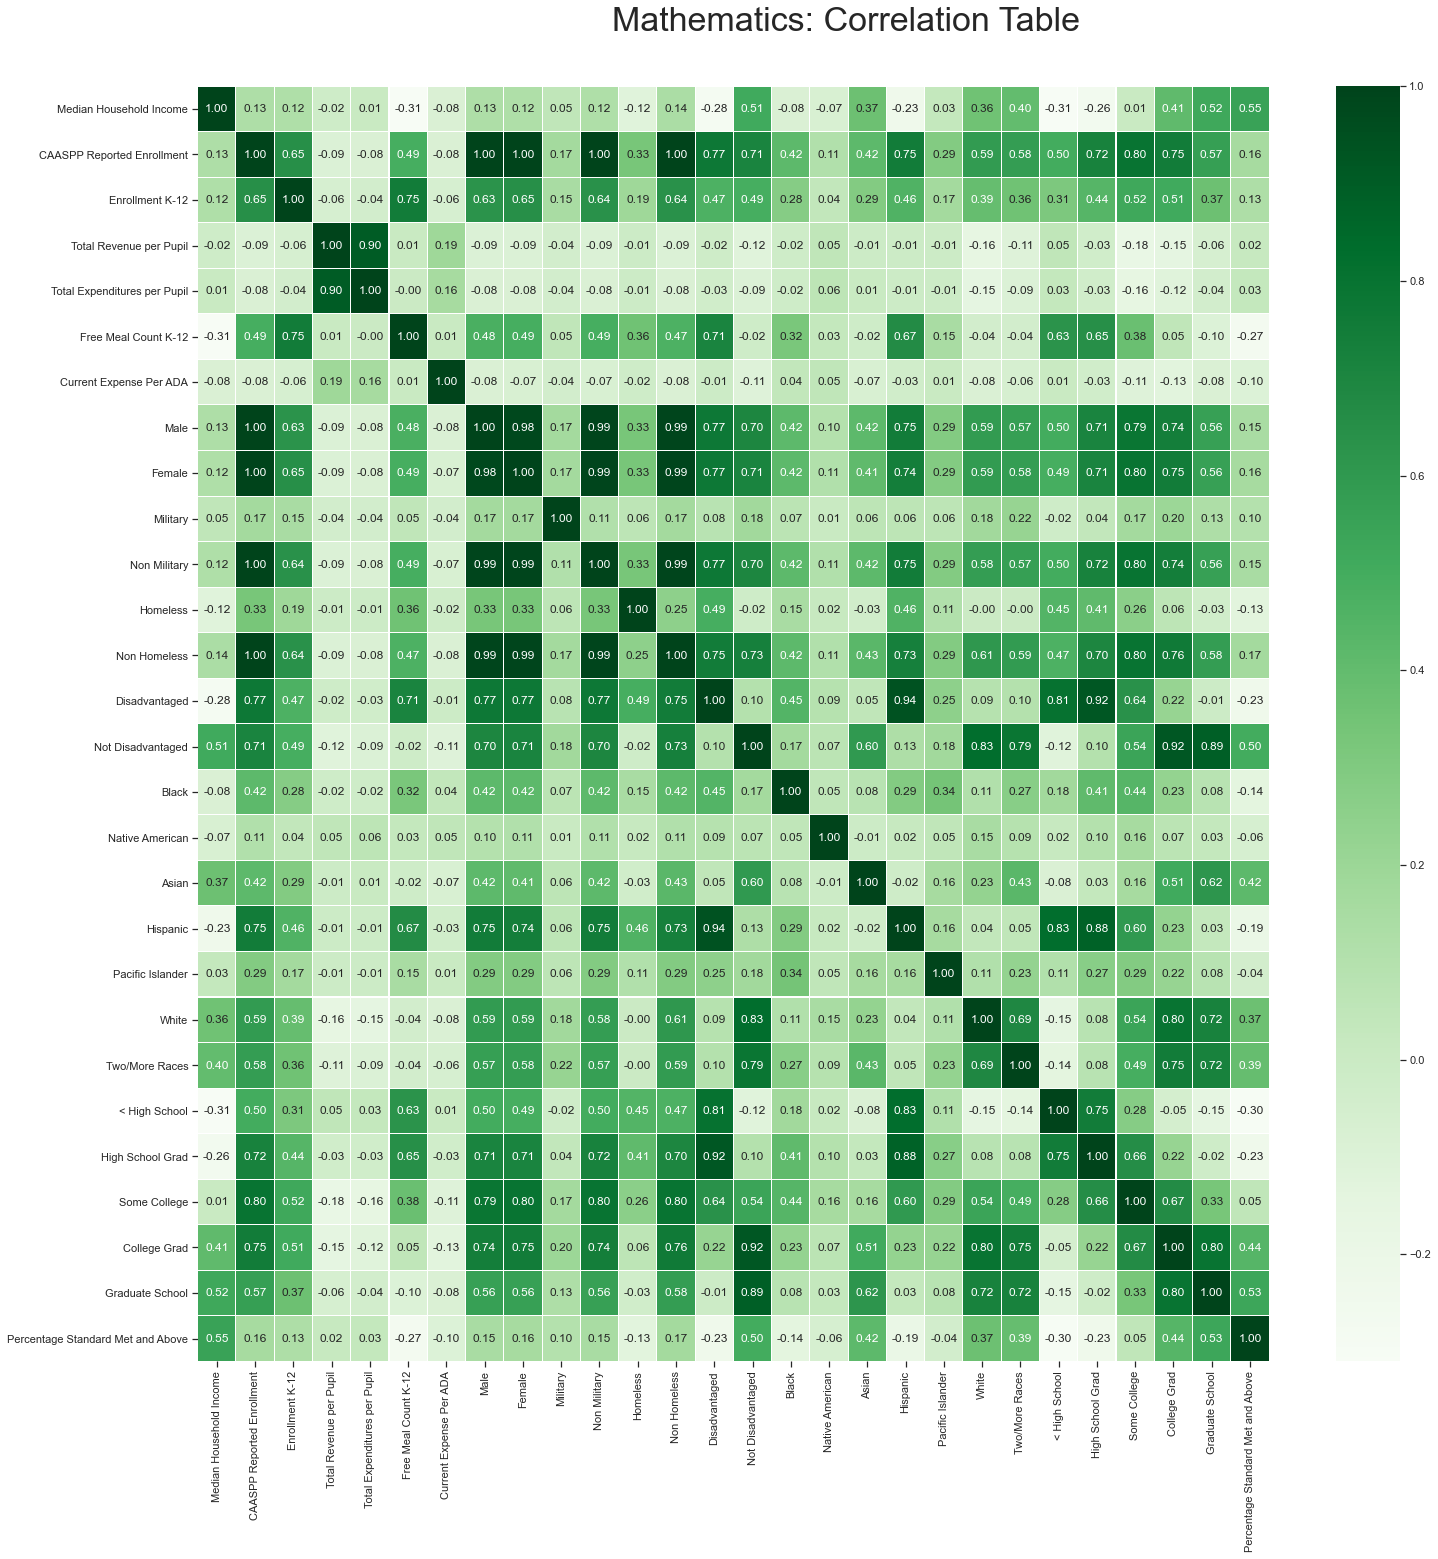

In [32]:
# Drop NaNs
df_filtered1 = df_math.dropna()


# Select variables
table1 = df_filtered1[['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]


# Run correlation on table constructed with count instead of percentage values
corrmat = table1.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="Greens",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Mathematics: Correlation Table', fontsize=34)

-------

### Dealing with missing data and updating data type.

- Data types:
    - Update values to int64, string or float as appropriate.
- Dealing with missing values:
    - Fill missing values with appropriate method.
- Differentiate NaN from other types of missing data:
    - NaNs = 0
    - * = -1

In [15]:
# Turn the following columns to numeric
cols = ['Total Revenue per Pupil', 'Total Expenditures per Pupil', 'Percentage Standard Met and Above']
df_math[cols] = df_math[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Drop rows where dependent variable missing
df_math = df_math[df_math['Percentage Standard Met and Above'].notna()]

# Replace missing values * with -1 anmd NaN woith 0
df_math.update(df_math[['CAASPP Reported Enrollment', 'Latitude',
       'Enrollment K-12','Male', 'Female', 'Military', 'Non Military', 'Longitude',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']].replace('*', -1).fillna(0))

In [16]:
# Turn following columns into numeric
cols = ['CAASPP Reported Enrollment', 'County Code', 'Latitude',
       'Enrollment K-12','Male', 'Female', 'Military', 'Non Military', 'Longitude',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']

df_math[cols] = df_math[cols].apply(pd.to_numeric, errors='coerce', axis=1)

df_math.head()

,School Name,School Code,Zip Code,County Name,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,129882,92223,Riverside,33.0,33.962281,-116.984589,64738.0,58.0,88.0,...,33.0,0.0,18.0,0.0,6.0,13.0,22.0,9.0,4.0,10.71
1,A. E. Arnold Elementary,6027767,90630,Orange,30.0,33.824900,-118.045700,84051.0,447.0,739.0,...,131.0,-1.0,111.0,7.0,15.0,44.0,85.0,138.0,121.0,63.41
2,A. G. Cook Elementary,6028211,92844,Orange,30.0,33.777700,-117.953000,48345.0,192.0,366.0,...,43.0,0.0,10.0,6.0,-1.0,13.0,14.0,33.0,6.0,71.81
3,A. G. Currie Middle,6085377,92780,Orange,30.0,33.743100,-117.824900,64089.0,585.0,611.0,...,532.0,-1.0,15.0,-1.0,223.0,168.0,82.0,39.0,15.0,18.35
4,A. J. Dorsa Elementary,6046114,95122,Santa Clara,43.0,37.369388,-121.833560,57470.0,184.0,371.0,...,166.0,0.0,-1.0,-1.0,82.0,55.0,24.0,15.0,-1.0,25.41


In [17]:
# Impute missing data with median for the following columns
df_math['Median Household Income'].fillna(df_math['Median Household Income'].median(), inplace=True)
df_math['Free Meal Count K-12'].fillna(df_math['Free Meal Count K-12'].median(), inplace=True)
df_math['Current Expense Per ADA'].fillna(df_math['Current Expense Per ADA'].median(), inplace=True)
df_math['Total Revenue per Pupil'].fillna(df_math['Total Revenue per Pupil'].median(), inplace=True)
df_math['Total Expenditures per Pupil'].fillna(df_math['Total Expenditures per Pupil'].median(), inplace=True)

# percentage of missing data per column
percent_missing = (df_math.isnull().sum() * 100 / len(df_math)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

# sorting values in ascending format
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,percent_missing
School Name,0.0
Non Homeless,0.0
Disadvantaged,0.0
Not Disadvantaged,0.0
Black,0.0
Native American,0.0
Asian,0.0
Homeless,0.0
Hispanic,0.0
White,0.0


In [18]:
# Check for duplicate
df_math.duplicated().sum()

0

-------------

## DATA TRANSFORMATION
### Transform race, gender and education columns into percentage

**Language Arts & Literacy Dataset**

In [19]:
# make copy of df_language to transform selected column into percentage values
language = df_language.copy()

#language.head()

In [20]:
language.columns

Index(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude', 'Median Household Income',
       'CAASPP Reported Enrollment', 'Enrollment K-12',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil',
       'Free Meal Count K-12', 'Current Expense Per ADA', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above'],
      dtype='object')

In [21]:
# Function to transform values in percentage
def percentage(df, demographic):
    df[demographic] = ((df[demographic] / df['CAASPP Reported Enrollment']).round(4))*100

# List with column names to modify into percentage values
demographics = ['Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']

# Loop through list apply percentage()
for i in demographics:
    percentage(language, i)

language.head()

,School Name,School Code,Zip Code,County Name,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,129882,92223,Riverside,33.0,33.962281,-116.984589,64738.0,58.0,88.0,...,56.90,0.00,31.03,0.00,10.34,22.41,37.93,15.52,6.90,44.64
1,A. E. Arnold Elementary,6027767,90630,Orange,30.0,33.824900,-118.045700,84051.0,447.0,739.0,...,29.31,-0.22,24.83,1.57,3.36,9.84,19.02,30.87,27.07,65.60
2,A. G. Cook Elementary,6028211,92844,Orange,30.0,33.777700,-117.953000,48345.0,192.0,366.0,...,22.40,0.00,5.21,3.12,-0.52,6.77,7.29,17.19,3.12,81.18
3,A. G. Currie Middle,6085377,92780,Orange,30.0,33.743100,-117.824900,64089.0,585.0,611.0,...,90.94,-0.17,2.56,-0.17,38.12,28.72,14.02,6.67,2.56,30.38
4,A. J. Dorsa Elementary,6046114,95122,Santa Clara,43.0,37.369388,-121.833560,57470.0,184.0,371.0,...,90.22,0.00,-0.54,-0.54,44.57,29.89,13.04,8.15,-0.54,29.83


In [22]:
# # create csv file with percentage values

# language.to_csv("language_with_percentage_values", encoding='utf-8', index=False)

**Mathematics Dataset**

In [23]:
# make copy of df to transform selected column into percentage values
math = df_math.copy()

#math.head()

In [24]:
# Loop through list apply percentage()
for i in demographics:
    percentage(math, i)

math.head()

,School Name,School Code,Zip Code,County Name,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,129882,92223,Riverside,33.0,33.962281,-116.984589,64738.0,58.0,88.0,...,56.90,0.00,31.03,0.00,10.34,22.41,37.93,15.52,6.90,10.71
1,A. E. Arnold Elementary,6027767,90630,Orange,30.0,33.824900,-118.045700,84051.0,447.0,739.0,...,29.31,-0.22,24.83,1.57,3.36,9.84,19.02,30.87,27.07,63.41
2,A. G. Cook Elementary,6028211,92844,Orange,30.0,33.777700,-117.953000,48345.0,192.0,366.0,...,22.40,0.00,5.21,3.12,-0.52,6.77,7.29,17.19,3.12,71.81
3,A. G. Currie Middle,6085377,92780,Orange,30.0,33.743100,-117.824900,64089.0,585.0,611.0,...,90.94,-0.17,2.56,-0.17,38.12,28.72,14.02,6.67,2.56,18.35
4,A. J. Dorsa Elementary,6046114,95122,Santa Clara,43.0,37.369388,-121.833560,57470.0,184.0,371.0,...,90.22,0.00,-0.54,-0.54,44.57,29.89,13.04,8.15,-0.54,25.41


In [25]:
# # create csv file with percentage values

# math.to_csv("math_with_percentage_values", encoding='utf-8', index=False)

------